Question : How does El Nino and La Nina phenomena affect Singapore weather ? 

This data analysis is for a visual insight on phenomena of 'El Nino and La Nina '. These phenomenon influence the rainfall patterns around the world . They are due to the sea atomospheric interaction in the East and Central Pacific Ocean . The build up of 'El Nino' conditions can  indicate the occurance of drought as it causes lesser than average rainfall . The opposite condition is 'La Nina' which indicates heavy to excess rainfall causing floods. 

These conditions are observed by monitoring SST(Sea Surface Temperature) and various other variables such as sea level pressure, wind indexes etc . The Southern Oscillation index is one such indicator. 

The Southern Oscillation is the atmospheric component of El Niño. This component is an oscillation in surface air pressure between the tropical eastern and the western Pacific Ocean waters. The strength of the Southern Oscillation is measured by the Southern Oscillation Index (SOI). The SOI is computed from fluctuations in the surface air pressure difference between Tahiti (in the Pacific) and Darwin, Australia (on the Indian Ocean).

El Niño episodes have negative SOI, meaning there is lower pressure over Tahiti and higher pressure in Darwin.
La Niña episodes have positive SOI, meaning there is higher pressure in Tahiti and lower in Darwin.

This analysis is for visually correlating the El Nino and La Nina conditions in the past with respect to Singapore weather. 
The SOI index plot shows the varying index values and the years which had La Nina and El Nino episodes. 
The Singapore rainfall plot shows that Singapore experienced higher than average rainfall during La Nina episodes and the opposite during El Nino. 
The historical surface air temperature plot for Singapore also indicates the El Nino  where in the temperature is 0.5 degrees greater than average and opposite for La Nina . 

Data Sources : 
1. http://www.bom.gov.au/climate/current/soihtm1.shtml
2. https://data.gov.sg/dataset/rainfall-monthly-total
3. https://data.gov.sg/dataset/surface-air-temperature-monthly-mean

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
## Read in Southern Oscillation index data 
soi = pd.read_csv('soi.csv', sep = ';')

In [3]:
soi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 13 columns):
Year    144 non-null int64
Jan     144 non-null float64
Feb     144 non-null float64
Mar     144 non-null float64
Apr     144 non-null float64
May     144 non-null float64
Jun     144 non-null float64
Jul     144 non-null float64
Aug     143 non-null float64
Sep     143 non-null float64
Oct     143 non-null float64
Nov     143 non-null float64
Dec     143 non-null float64
dtypes: float64(12), int64(1)
memory usage: 14.7 KB


In [4]:
soi.tail()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
139,2015,-7.8,0.6,-11.2,-3.8,-13.7,-12.0,-14.7,-19.8,-17.8,-20.2,-5.3,-9.1
140,2016,-19.7,-19.7,-4.7,-22.0,2.8,5.8,4.2,5.3,13.5,-4.3,-0.7,2.6
141,2017,1.3,-2.2,5.1,-6.3,0.5,-10.4,8.1,3.3,6.9,9.1,11.8,-1.4
142,2018,8.9,-6.0,10.5,4.5,2.1,-5.5,1.6,-6.9,-10.0,3.0,-0.1,9.3
143,2019,-0.6,-13.5,-6.8,-1.3,-9.0,-10.4,-5.6,NaN,NaN,NaN,NaN,NaN


In [5]:
soi.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1876,11.3,11.0,0.2,9.4,6.8,17.2,-5.6,12.3,10.5,-8.0,-2.7,-3.0
1,1877,-9.7,-6.5,-4.7,-9.6,3.6,-16.8,-10.2,-8.2,-17.2,-16.0,-12.6,-12.6
2,1878,-8.7,-21.1,-15.5,-8.8,2.1,-3.1,15.9,13.0,17.7,10.9,15.1,17.9
3,1879,12.7,14.3,13.2,12.7,2.1,16.4,21.8,22.6,18.9,15.2,9.8,-5.5
4,1880,10.8,7.7,14.3,5.3,12.3,9.1,1.6,14.3,8.1,4.8,7.2,-1.9


In [6]:
def merge_cols(df , type):
    """
    This function is for merging the months columns to a single column , required for plotting .
    Returns a series contaning the year wise monthly dates. 
    Also a series containing the corresponding values of soi.
    """
    date = []
    date_value = []
        
    months = df.index.tolist()[1:]
    year = str(int(df['Year']))
    
    for i in range(12):
        date.append(pd.to_datetime(year +  months[i], format = '%Y%b'))
        date_value.append(df[months[i]]) 
    ## since can not return back two series because of 'apply' function on each row 
    ## need to return them seperately
        
    if type == 'date':
        return date
    else:
        return date_value

temp_dates = soi.apply(lambda x: merge_cols(x, 'date') , axis = 1)

## Apply returns back series object
temp_dates.tolist()     

## Merge  the list of dates into one list .
year_wise = []
for year in temp_dates:
    for months in year:
        year_wise.append(months)
    

temp_datevalues = soi.apply(lambda x: merge_cols(x, 'date_value') , axis = 1)

## apply returns back 'Series' object.
temp_datevalues.tolist()     

## merge the soi value list into one.
year_wise_value = []
for year in temp_datevalues:
    for months in year:
        year_wise_value.append(months)
        
soi_new_df = pd.DataFrame({"Year" :year_wise , "soi_val" :year_wise_value})

soi_new_df.set_index('Year', inplace = True )
soi_new_df.head()

,soi_val
Year,
1876-01-01,11.3
1876-02-01,11.0
1876-03-01,0.2
1876-04-01,9.4
1876-05-01,6.8


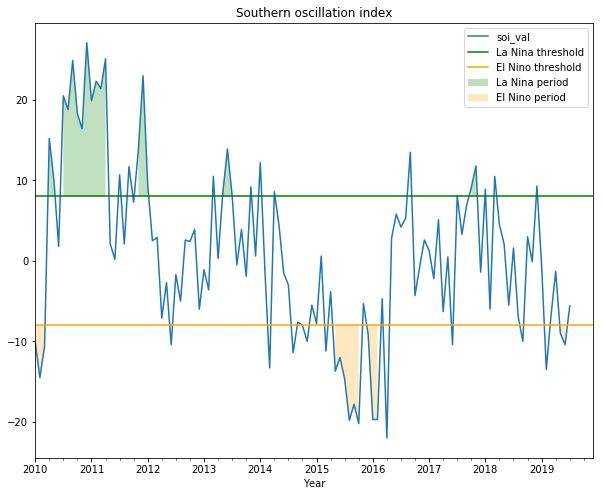

In [7]:
pos_val = soi_new_df['2010':]['soi_val']

soi_new_df['2010':].plot(figsize = (10,8), title = ("Southern oscillation index"))
plt.axhline(8 , color = 'green', label = 'La Nina threshold')
plt.axhline(-8, color = 'orange', label = 'El Nino threshold')
## Mark the periods 
plt.gca().fill_between(soi_new_df['2010':].index ,8, pos_val , where = (pos_val > 8) , facecolor = 'green' , alpha = 0.25, label = 'La Nina period')
plt.gca().fill_between(soi_new_df['2010':].index ,-8, pos_val , where = (pos_val < -8) , facecolor = 'orange' , alpha = 0.25 , label = 'El Nino period')

plt.legend()
plt.show()

In [8]:
## Read in the Singapore Rainfall figures 
sg_rainfall = pd.read_csv("rainfall-monthly-total.csv")

In [9]:
sg_rainfall.head()

,month,total_rainfall
0,1982-01,107.1
1,1982-02,27.8
2,1982-03,160.8
3,1982-04,157.0
4,1982-05,102.2


In [10]:
sg_rainfall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 2 columns):
month             450 non-null object
total_rainfall    450 non-null float64
dtypes: float64(1), object(1)
memory usage: 7.1+ KB


In [11]:
## convert into DateTime object 
sg_rainfall['Year'] = pd.to_datetime(sg_rainfall['month'], format = "%Y-%m")

In [12]:
sg_rainfall.head()

,month,total_rainfall,Year
0,1982-01,107.1,1982-01-01
1,1982-02,27.8,1982-02-01
2,1982-03,160.8,1982-03-01
3,1982-04,157.0,1982-04-01
4,1982-05,102.2,1982-05-01


In [13]:
sg_rainfall.set_index('Year' , inplace = True)

In [14]:
## Read in Singapore surface air temperatures 
sg_temp = pd.read_csv("surface-air-temperature-monthly-mean.csv")

In [15]:
sg_temp.head()

,month,mean_temp
0,1982-01,25.9
1,1982-02,27.1
2,1982-03,27.2
3,1982-04,27.0
4,1982-05,28.0


In [16]:
## convert into DateTime object 
sg_temp['Year'] = pd.to_datetime(sg_temp['month'], format = "%Y-%m")

In [17]:
sg_temp.set_index('Year' , inplace = True)

In [18]:
sg_temp.head()

,month,mean_temp
Year,,
1982-01-01,1982-01,25.9
1982-02-01,1982-02,27.1
1982-03-01,1982-03,27.2
1982-04-01,1982-04,27.0
1982-05-01,1982-05,28.0


In [19]:
## Merge the rainfall and temperature data . 
sg_all = pd.merge(sg_rainfall , sg_temp ,how = 'inner', left_index = True, right_index = True )

In [20]:
sg_all.head() 

,month_x,total_rainfall,month_y,mean_temp
Year,,,,
1982-01-01,1982-01,107.1,1982-01,25.9
1982-02-01,1982-02,27.8,1982-02,27.1
1982-03-01,1982-03,160.8,1982-03,27.2
1982-04-01,1982-04,157.0,1982-04,27.0
1982-05-01,1982-05,102.2,1982-05,28.0


In [21]:
sg_all.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 450 entries, 1982-01-01 to 2019-06-01
Data columns (total 4 columns):
month_x           450 non-null object
total_rainfall    450 non-null float64
month_y           450 non-null object
mean_temp         450 non-null float64
dtypes: float64(2), object(2)
memory usage: 37.6+ KB


In [22]:
sg_all.drop(['month_x','month_y'], axis = 1, inplace = True)

In [23]:
sg_all.rename(columns = {'mean_temp' : "mean_monthly_temp", "total_rainfall"  : 'total_monthly_rainfall'}, inplace = True)

In [24]:
sg_all.head()

,total_monthly_rainfall,mean_monthly_temp
Year,,
1982-01-01,107.1,25.9
1982-02-01,27.8,27.1
1982-03-01,160.8,27.2
1982-04-01,157.0,27.0
1982-05-01,102.2,28.0


In [25]:
avg_all = sg_all.resample('A').mean()

In [26]:
june_sep_all = sg_all.reset_index()[pd.Series(sg_all.index.month.tolist()).isin([6,7,8,9])]

In [27]:
june_sep_all.set_index('Year', inplace = True)

In [28]:
june_sep_all.head()

,total_monthly_rainfall,mean_monthly_temp
Year,,
1982-06-01,59.5,28.4
1982-07-01,76.3,28.2
1982-08-01,169.5,27.7
1982-09-01,54.1,27.9
1983-06-01,94.0,28.3


In [29]:
june_sep_avg = june_sep_all.resample('A').mean()

In [31]:
june_sep_all.mean()

total_monthly_rainfall    145.245638
mean_monthly_temp          28.046309
dtype: float64

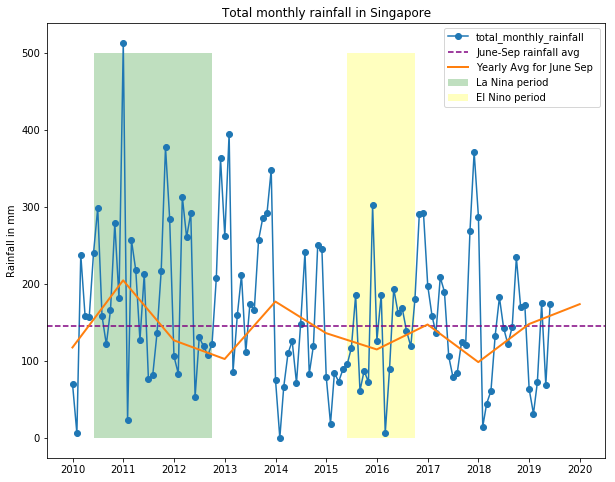

In [43]:
## Plot the rainfall amount by months as well as the yearly mean .
## Mark the years for El Nino and La Nina .

plt.figure(figsize = (10,8))
plt.plot(sg_all['2010':]['total_monthly_rainfall'] , '-o')
vertical_lines = [pd.to_datetime('2010-06-01', format = '%Y-%m-%d'), pd.to_datetime('2012-10-01', format = '%Y-%m-%d'),pd.to_datetime('2015-06-01', format = '%Y-%m-%d'),pd.to_datetime('2016-10-01', format = '%Y-%m-%d') ]
plt.ylabel("Rainfall in mm")
plt.title("Total monthly rainfall in Singapore")
plt.axhline(june_sep_all.mean()['total_monthly_rainfall'] ,ls = '--' , color = 'purple', label ='June-Sep rainfall avg')
plt.plot(june_sep_avg['2009':]['total_monthly_rainfall'] , label = 'Yearly Avg for June Sep ' , linewidth = 2)


## Mark the periods 
y_values = np.arange(0,550, 50)
plt.fill_betweenx(y_values, vertical_lines[0], vertical_lines[1] , facecolor = 'green' , alpha = 0.25, label = 'La Nina period')
plt.fill_betweenx(y_values, vertical_lines[2], vertical_lines[3] , facecolor = 'yellow' , alpha = 0.25, label = 'El Nino period')

plt.legend()
plt.show()

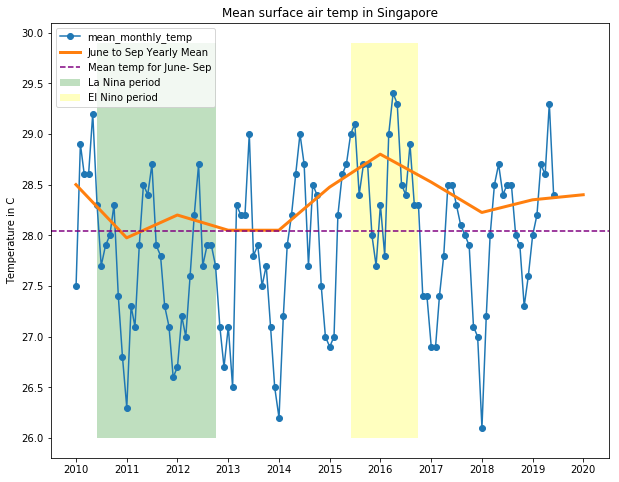

In [50]:
## Plot the temperature by months as well as the yearly mean .
## Mark the years for El Nino and La Nina .

plt.figure(figsize = (10,8))
plt.plot(sg_all['2010':]['mean_monthly_temp'] , '-o')
vertical_lines = [pd.to_datetime('2010-06-01', format = '%Y-%m-%d'), pd.to_datetime('2012-10-01', format = '%Y-%m-%d'),pd.to_datetime('2015-06-01', format = '%Y-%m-%d'),pd.to_datetime('2016-10-01', format = '%Y-%m-%d') ]
plt.ylabel("Temperature in C")
plt.title("Mean surface air temp in Singapore")

plt.plot(june_sep_avg['2009':]['mean_monthly_temp'] , label = 'June to Sep Yearly Mean' , linewidth = 3)
plt.axhline(june_sep_all.mean()['mean_monthly_temp'] , color = 'purple' , label = 'Mean temp for June- Sep', ls = "--")

## Mark the periods 
y_values = np.arange(26,30, 0.1)

plt.fill_betweenx(y_values, vertical_lines[0], vertical_lines[1] , facecolor = 'green' , alpha = 0.25, label = 'La Nina period')
plt.fill_betweenx(y_values, vertical_lines[2], vertical_lines[3] , facecolor = 'yellow' , alpha = 0.25, label = 'El Nino period')
plt.legend()
plt.show()

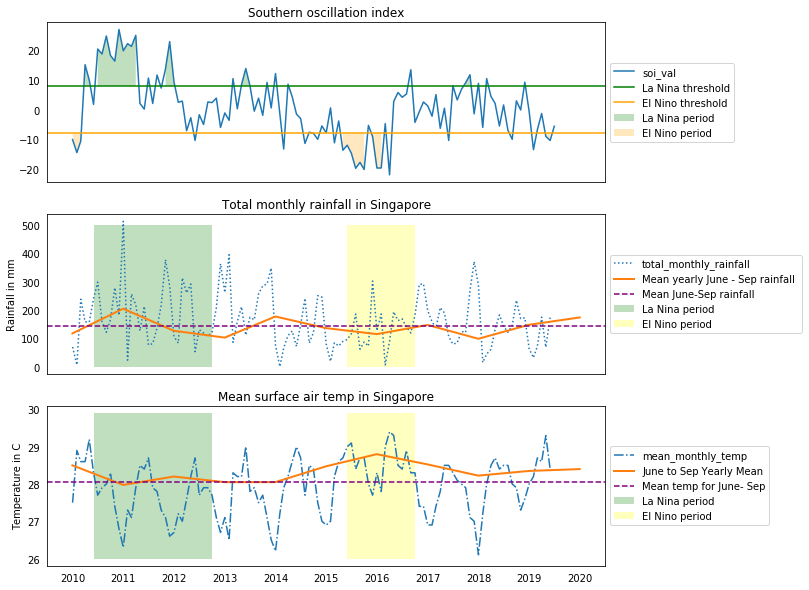

In [53]:
## Combine the above 3 plots into a single frame .
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, figsize = (10,10))

pos_val = soi_new_df['2010':]['soi_val']

#soi_new_df['2010':].plot(figsize = (10,8), title = ("Southern oscillation index"))

ax1.plot(soi_new_df['2010':]['soi_val'])
ax1.axhline(8 , color = 'green', label = 'La Nina threshold')
ax1.axhline(-8, color = 'orange', label = 'El Nino threshold')
## Mark the periods 
ax1.fill_between(soi_new_df['2010':].index ,8, pos_val , where = (pos_val > 8) , facecolor = 'green' , alpha = 0.25, label = 'La Nina period')
ax1.fill_between(soi_new_df['2010':].index ,-8, pos_val , where = (pos_val < -8) , facecolor = 'orange' , alpha = 0.25 , label = 'El Nino period')
ax1.set_title("Southern oscillation index")
ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#plt.show()

## Second plot 

ax2.plot(sg_all['2010':]['total_monthly_rainfall'] , ':')
vertical_lines = [pd.to_datetime('2010-06-01', format = '%Y-%m-%d'), pd.to_datetime('2012-10-01', format = '%Y-%m-%d'),pd.to_datetime('2015-06-01', format = '%Y-%m-%d'),pd.to_datetime('2016-10-01', format = '%Y-%m-%d') ]
ax2.set_ylabel("Rainfall in mm")
ax2.set_title("Total monthly rainfall in Singapore")

ax2.plot(june_sep_avg['2009':]['total_monthly_rainfall'] , label = 'Mean yearly June - Sep rainfall ', linewidth = 2)
ax2.axhline(june_sep_all.mean()['total_monthly_rainfall'] ,ls = '--' , color = 'purple', label ='Mean June-Sep rainfall')

## Mark the periods 
y_values = np.arange(0,550, 50)
ax2.fill_betweenx(y_values, vertical_lines[0], vertical_lines[1] , facecolor = 'green' , alpha = 0.25, label = 'La Nina period')
ax2.fill_betweenx(y_values, vertical_lines[2], vertical_lines[3] , facecolor = 'yellow' , alpha = 0.25, label = 'El Nino period')

ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5))

## Third plot 

ax3.plot(sg_all['2010':]['mean_monthly_temp'] , '-.')
vertical_lines = [pd.to_datetime('2010-06-01', format = '%Y-%m-%d'), pd.to_datetime('2012-10-01', format = '%Y-%m-%d'),pd.to_datetime('2015-06-01', format = '%Y-%m-%d'),pd.to_datetime('2016-10-01', format = '%Y-%m-%d') ]
ax3.set_ylabel("Temperature in C")
ax3.set_title("Mean surface air temp in Singapore")

ax3.plot(june_sep_avg['2009':]['mean_monthly_temp'] , label = 'June to Sep Yearly Mean', linewidth = 2)
ax3.axhline(june_sep_all.mean()['mean_monthly_temp'] , color = 'purple' , label = 'Mean temp for June- Sep', ls = "--")

## Mark the periods 
y_values = np.arange(26,30, 0.1)

ax3.fill_betweenx(y_values, vertical_lines[0], vertical_lines[1] , facecolor = 'green' , alpha = 0.25, label = 'La Nina period')
ax3.fill_betweenx(y_values, vertical_lines[2], vertical_lines[3] , facecolor = 'yellow' , alpha = 0.25, label = 'El Nino period')
ax3.legend(loc='center left', bbox_to_anchor=(1, 0.5))

ax1.tick_params(left = 'off', bottom = 'off')
ax2.tick_params(left = 'off', bottom = 'off')
ax3.tick_params(left = 'off', bottom = 'off')

plt.show()



Reference: http://www.weather.gov.sg/learn_climate/#climate6.